In [1]:
from utils.cluster import *
from utils.geo import *
from utils.loaddata import *
from utils.utils import *

In [2]:
data = get_h5data("./data/UnicomBJ_flows.h5")
print(data.shape)
print("time interval amounts(1 hour): ", data.shape[0])
print("grid horizontal amounts: ", data.shape[2])
print("grid vertical amounts: ", data.shape[3])

(2184, 2, 32, 32)
time interval amounts(1 hour):  2184
grid horizontal amounts:  32
grid vertical amounts:  32


In [3]:
inflow = data[:, 0, :, :].reshape(len(data), -1).T
outflow = data[:, 0, :, :].reshape(len(data), -1).T

# normalize
inflow_norm = norm_by_row(inflow)
outflow_norm = norm_by_row(outflow)

print("inflow_norm shape: ", inflow_norm.shape, \
    "outflow_norm shape: ", outflow_norm.shape)

inflow_norm shape:  (1024, 2184) outflow_norm shape:  (1024, 2184)


In [4]:
# cluster expriments
import matplotlib.pyplot as plt
from numpy import *
from tqdm import *

cluster_methods = ['kmeans', 'kpp_means', 'bi_kmeans', 'dbscan', 'optics']

# kmeans耗时过长，在k=12时就呈现出无法收敛的状态，平均每次聚类耗费时间10m以上
# kmeans_sse = []
# kmeans_stds = []
# for i in trange(3, 30):
#     cur_sses = []
#     for j in trange(0, 10):
#         centroid, cluster_assment = kmeans(inflow_norm, i)
#         cur_sses.append(sum(cluster_assment[:,1]))
#     kmeans_sse.append(sum(cur_sses)/10)
#     kmeans_stds.append(std(cur_sses, ddof=1))

<Figure size 1440x1440 with 0 Axes>

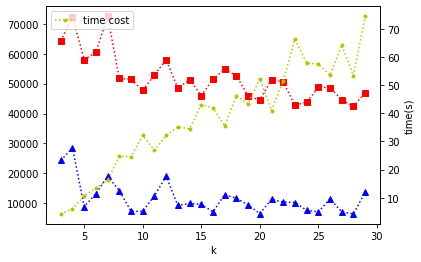

In [10]:
kmeans_times = [4.26, 6.08, 10.72, 13.46, 16.25, 24.69, 24.61, 32.11, 26.86, 32.14, 35.20, 34.50, 42.94, 41.96, 35.52, 46.26, 43.34, 52.29, 40.97, 51.54, 66.32, 57.84, 57.45, 53.48, 64.21, 53.36, 74.43]

fig = plt.figure(figsize=(20, 20))
_, ax = plt.subplots()
ax.plot(range(3, 30), kmeans_sse, c='r', ls=':', marker='s', label='sse')
ax.plot(range(3, 30), kmeans_stds, c='b', ls=':', marker='^', label='std')
ax.set_xlabel('k')

ax1 = ax.twinx()
ax1.plot(range(3, 30), kmeans_times, c='y', ls=':', marker='.', label='time cost')
ax1.set_ylabel('time(s)')

plt.legend()
plt.show()

In [12]:
np.save('kmeans_sse.npy',kmeans_sse)
np.save('kmeans_stds.npy',kmeans_stds)

In [ ]:
kpp_means_sse = []
kpp_means_stds = []
for i in trange(3, 30):
    cur_sses = []
    for j in trange(0, 10):
        centroid, cluster_assment = kpp_means(mat(inflow_norm), i)
        cur_sses.append(sum(cluster_assment[:,1]))
    kpp_means_sse.append(sum(cur_sses)/10)
    kpp_means_stds.append(std(cur_sses, ddof=1))

<Figure size 1440x1440 with 0 Axes>

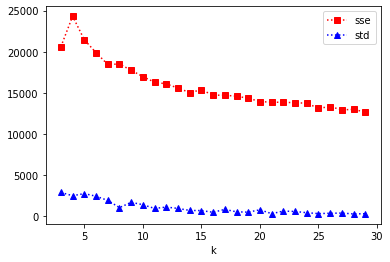

In [14]:
fig = plt.figure(figsize=(20, 20))
_, ax = plt.subplots()
ax.plot(range(3, 30), kpp_means_sse, c='r', ls=':', marker='s', label='sse')
ax.plot(range(3, 30), kpp_means_stds, c='b', ls=':', marker='^', label='std')
ax.set_xlabel('k')

plt.legend()
plt.show()

In [15]:
np.save('kpp_means_sse.npy',kpp_means_sse)
np.save('kpp_means_stds.npy',kpp_means_stds)

In [ ]:
bi_kmeans_sse = []
bi_kmeans_stds = []
for i in trange(3, 30):
    cur_sses = []
    for j in trange(0, 10):
        centroid, cluster_assment = bi_kmeans(mat(inflow_norm), i)
        cur_sses.append(sum(cluster_assment[:,1]))
    bi_kmeans_sse.append(sum(cur_sses)/10)
    bi_kmeans_stds.append(std(cur_sses, ddof=1))

<Figure size 1440x1440 with 0 Axes>

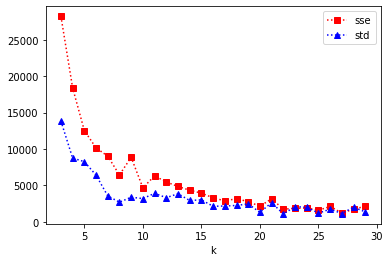

In [6]:
fig = plt.figure(figsize=(20, 20))
_, ax = plt.subplots()
ax.plot(range(3, 30), bi_kmeans_sse, c='r', ls=':', marker='s', label='sse')
ax.plot(range(3, 30), bi_kmeans_stds, c='b', ls=':', marker='^', label='std')
ax.set_xlabel('k')

plt.legend()
plt.show()

In [7]:
np.save('bi_kmeans-cluster_assment.npy', cluster_assment)
np.save('bi_kmeans-centroid.npy', centroid)
np.save('bi_kmeans_sse.npy', bi_kmeans_sse)
np.save('bi_kmeans_stds.npy', bi_kmeans_stds)

In [ ]:
dbscan_sse = []
dbscan_stds = []
for i in range(2, 10):
    for j in [0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.]:
        cur_sses = []
        for k in range(10):
            centroid, cluster_assment=dbscan_lib(inflow_norm, eps = j, minPts=i)
            cur_sses.append(sum(cluster_assment[:,1]))
        dbscan_sse.append(sum(cur_sses)/10)
        dbscan_stds.append(std(cur_sses, ddof=1))

<Figure size 1440x1440 with 0 Axes>

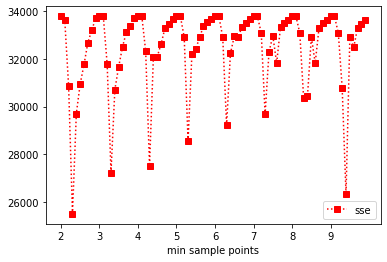

In [6]:
fig = plt.figure(figsize=(20, 20))
_, ax = plt.subplots()
ax.plot(range(0, 80), dbscan_sse, c='r', ls=':', marker='s', label='sse')
ax.set_xlabel('min sample points')
plt.xticks(range(0, 80, 10), tuple(range(2, 10)))
plt.legend()
plt.show()

In [7]:
np.save('dbscan_sse.npy', dbscan_sse)
np.save('dbscan_stds.npy', dbscan_stds)

In [ ]:
optics_sse = []
optics_stds = []
for i in range(2, 10):
    for j in [0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.]:
        cur_sses = []
        for k in range(10):
            centroid, cluster_assment=optics_lib(inflow_norm, eps = j, minPts=i)
            cur_sses.append(sum(cluster_assment[:,1]))
        optics_sse.append(sum(cur_sses)/10)
        optics_stds.append(std(cur_sses, ddof=1))

<Figure size 1440x1440 with 0 Axes>

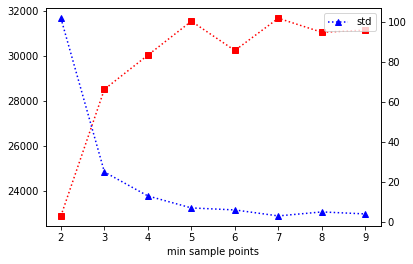

In [14]:
class_nums = [102, 25, 13, 7, 6, 3, 5, 4]
fig = plt.figure(figsize=(20, 20))
_, ax = plt.subplots()
ax.plot(range(0, 80, 10), [optics_sse[i] for i in range(0, 80, 10)] , c='r', ls=':', marker='s', label='sse')
# ax.plot(range(0, 80), optics_stds, c='b', ls=':', marker='^', label='std')
ax2 = ax.twinx()
ax2.plot(range(0, 80, 10), class_nums, c='b', ls=':', marker='^', label='std')

ax.set_xlabel('min sample points')
plt.xticks(range(0, 80, 10), tuple(range(2, 10)))

plt.legend()
plt.show()

In [18]:
np.save('optics_sse.npy', optics_sse)
np.save('optics_stds.npy', optics_stds)

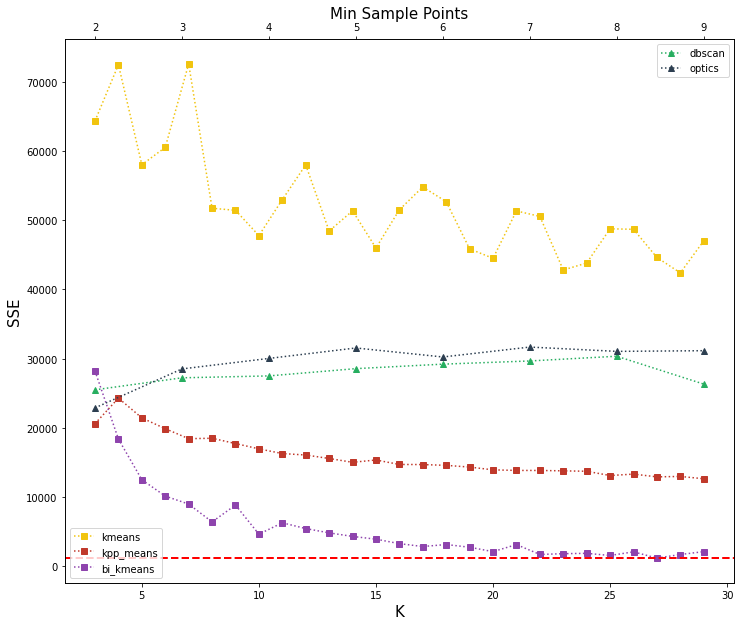

In [58]:
import matplotlib.pyplot as plt
sses = []
stds = []

colors = ['#f1c40f', '#c0392b', '#8e44ad', '#27ae60', '#2c3e50']

plt.rcParams.update({'font.size':10})

fig = plt.figure(figsize=(12, 10))
ax1 = fig.add_subplot(1, 1, 1)
for i in range(3):
    cur = load(cluster_methods[i] + '_sse.npy')
    ax1.plot(range(3, 30), cur, c=colors[i], ls=':', marker='s', label=cluster_methods[i])
    ax1.set_xlabel('K', fontsize=15)
    ax1.set_ylabel('SSE', fontsize=15)

ax1.legend(loc='lower left')
ax1.axhline(y=1214, c='r', ls='--', lw=2)

# ax2 = fig.add_subplot(1, 2, 2)
ax2 = ax1.twiny()
for i in range(3, 5):
    cur = load(cluster_methods[i] + '_sse.npy')
    mins = [min(cur[i:i + 10]) for i in range(0, 80, 10)]
    ax2.plot(range(2, 10), mins, c=colors[i], ls=':', marker='^', label=cluster_methods[i])
    ax2.set_xlabel('Min Sample Points', fontsize=15)
    # ax2.set_ylabel('SSE')

ax2.legend()


In [61]:
bi_kmeans_sse = load('bi_kmeans_sse.npy')
min_sse = min(bi_kmeans_sse)
min_k = argmin(bi_kmeans_sse)
print(min_sse, min_k)

1214.86516932395 24


In [ ]:
centroid, cluster_assment = bi_kmeans(mat(inflow_norm), min_k)
save('inflow_center_h.npy', centroid)
save('inflow_label_h.npy', cluster_assment[:, 0])
save('inflow_std_h.npy', sqrt(cluster_assment[:, 1]))

In [ ]:
centroid, cluster_assment = bi_kmeans(mat(outflow_norm), min_k)
save('outflow_center_h.npy', centroid)
save('outflow_label_h.npy', cluster_assment[:, 0])
save('outflow_std_h.npy', sqrt(cluster_assment[:, 1]))

In [71]:
inflow_mins = [min(inflow[i]) for i in range(inflow.shape[0])]
save('inflow_mins.npy', inflow_mins)
outflow_mins = [min(outflow[i]) for i in range(outflow.shape[0])]
save('outflow_mins.npy', outflow_mins)
print(len(inflow_mins), ", ", len(outflow_mins))

1024 ,  1024


In [6]:
inflow_norm_day = []
for i in range(0, inflow_norm.shape[0]):
    inflow_norm_day.append([sum(inflow_norm[i, j:j + 24]) for j in range(0, inflow_norm.shape[1], 24)])
inflow_norm_day = np.array(inflow_norm_day)
inflow_norm_day.shape

(1024, 91)

In [ ]:
kpp_means_sse = []
for i in trange(3, 30):
    cur = []
    for j in range(0, 10):
        centroid, cluster_labels, cur_sse = kmeans_lib(mat(inflow_norm_day), i)
        cur.append(cur_sse)
    kpp_means_sse.append(sum(cur)/10)
np.save('kpp_means_sse_d.npy', kpp_means_sse)

In [7]:
np.save('kpp_means_sse_d.npy', kpp_means_sse)

NameError: name 'kpp_means_sse' is not defined

In [ ]:
bi_kmeans_sse = []
for i in trange(3, 50):
    cur = []
    for j in range(0, 10):
        centroid, assment = bi_kmeans_lib(mat(inflow_norm_day), i)
        cur.append(sum(assment[:, 1]))
    bi_kmeans_sse.append(sum(cur)/10)
np.save('bi_kmeans_sse_d.npy', bi_kmeans_sse)

In [ ]:
dbscan_sse = []
for i in trange(2, 10):
    for j in [0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.]:
        cur = []
        for k in range(10):
            centroid, assment = bi_kmeans_lib(inflow_norm_day, eps=j, minPts=i)
            cur.append(sum(assment[:, 1]))
        dbscan_sse.append(sum(cur)/10)
np.save('dbscan_sse_d.npy', bi_kmeans_sse)

optics_sse = []
for i in trange(2, 10):
    for j in [0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.]:
        cur = []
        for k in range(10):
            centroid, assment = optics_lib(inflow_norm_day, eps=j, minPts=i)
            cur.append(sum(assment[:, 1]))
        optics_sse.append(sum(cur)/10)
np.save('optics_sse_d.npy', optics_sse)

In [7]:
# kpp_means_sse = []
# for i in trange(3, 30):
#     cur = []
#     for j in range(0, 10):
#         centroid, cluster_labels, cur_sse = kmeans_lib(mat(inflow_norm_day), i)
#         cur.append(cur_sse)
#     kpp_means_sse.append(sum(cur)/10)
# np.save('kpp_means_sse_d.npy', kpp_means_sse)

# bi_kmeans_sse = []
# for i in trange(3, 30):
#     cur = []
#     for j in range(0, 10):
#         centroid, assment = bi_kmeans_lib(mat(inflow_norm_day), i)
#         cur.append(sum(assment[:, 1]))
#     bi_kmeans_sse.append(sum(cur)/10)
# np.save('bi_kmeans_sse_d.npy', bi_kmeans_sse)

# dbscan_sse = []
# for i in trange(2, 10):
#     for j in [0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.]:
#         cur = []
#         for k in range(10):
#             centroid, assment = dbscan_lib(inflow_norm_day, eps=j, minPts=i)
#             cur.append(sum(assment[:, 1]))
#         dbscan_sse.append(sum(cur)/10)
# np.save('dbscan_sse_d.npy', bi_kmeans_sse)

optics_sse = []
for i in trange(2, 10):
    for j in [0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.]:
        cur = []
        for k in range(10):
            centroid, assment = optics_lib(inflow_norm_day, eps=j, minPts=i)
            cur.append(sum(assment[:, 1]))
        optics_sse.append(sum(cur)/10)
np.save('optics_sse_d.npy', optics_sse)

#=============================================================
inflow_norm_week = []
for i in range(0, inflow_norm.shape[0]):
    inflow_norm_week.append([sum(inflow_norm[i, j:j + 168]) for j in range(0, inflow_norm.shape[1], 168)])
inflow_norm_week = np.array(inflow_norm_week)
inflow_norm_week.shape

kpp_means_sse = []
for i in trange(3, 30):
    cur = []
    for j in range(0, 10):
        centroid, cluster_labels, cur_sse = kmeans_lib(mat(inflow_norm_week), i)
        cur.append(cur_sse)
    kpp_means_sse.append(sum(cur)/10)
np.save('kpp_means_sse_w.npy', kpp_means_sse)

bi_kmeans_sse = []
for i in trange(3, 30):
    cur = []
    for j in range(0, 10):
        centroid, assment = bi_kmeans_lib(mat(inflow_norm_week), i)
        cur.append(sum(assment[:, 1]))
    bi_kmeans_sse.append(sum(cur)/10)
np.save('bi_kmeans_sse_w.npy', bi_kmeans_sse)

dbscan_sse = []
for i in trange(2, 10):
    for j in [0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.]:
        cur = []
        for k in range(10):
            centroid, assment = dbscan_lib(inflow_norm_week, eps=j, minPts=i)
            cur.append(sum(assment[:, 1]))
        dbscan_sse.append(sum(cur)/10)
np.save('dbscan_sse_w.npy', bi_kmeans_sse)

optics_sse = []
for i in trange(2, 10):
    for j in [0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.]:
        cur = []
        for k in range(10):
            centroid, assment = optics_lib(inflow_norm_week, eps=j, minPts=i)
            cur.append(sum(assment[:, 1]))
        optics_sse.append(sum(cur)/10)
np.save('optics_sse_w.npy', optics_sse)

  0%|          | 0/8 [00:00<?, ?it/s]

unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique class num:  136
unique clas

 12%|█▎        | 1/8 [1:41:22<11:49:40, 6082.87s/it]

unique class num:  136
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique class num:  40
unique cl

 25%|██▌       | 2/8 [3:16:24<9:45:52, 5858.81s/it] 

unique class num:  40
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique cla

 38%|███▊      | 3/8 [4:51:27<8:02:16, 5787.30s/it]

unique class num:  21
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique class num:  13
unique cla

 50%|█████     | 4/8 [6:28:58<6:27:30, 5812.64s/it]

unique class num:  13
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique class num:  11
unique cla

 62%|██████▎   | 5/8 [8:07:22<4:52:16, 5845.44s/it]

unique class num:  11
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class

 75%|███████▌  | 6/8 [9:43:44<3:14:08, 5824.14s/it]

unique class num:  7
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class 

 88%|████████▊ | 7/8 [11:22:07<1:37:29, 5849.73s/it]

unique class num:  5
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class num:  6
unique class 

100%|██████████| 8/8 [12:59:03<00:00, 5842.95s/it]  


unique class num:  6


  0%|          | 0/27 [00:00<?, ?it/s]

sse_split, sse_nonsplit 509657.3245659488 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 294951.67638249806 509657.3245659488
sse_split, sse_nonsplit 397961.2542745739 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  426
sse_split, sse_nonsplit 498575.07415577397 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 275237.6625963198 493757.50050111185
sse_split, sse_nonsplit 332498.5660102783 4817.573654662155
the bestCentToSplit is:  1
the len of bestClustAss is:  597
sse_split, sse_nonsplit 893514.466065176 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 176029.21016111624 874858.9232111387
sse_split, sse_nonsplit 317153.5741768638 18655.54285403737
the bestCentToSplit is:  1
the len of bestClustAss is:  597
sse_split, sse_nonsplit 813340.2680092963 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 234189.67413625505 

  4%|▎         | 1/27 [00:21<09:11, 21.23s/it]

sse_split, sse_nonsplit 274878.54961795657 326572.3737602973
the bestCentToSplit is:  1
the len of bestClustAss is:  427
sse_split, sse_nonsplit 621990.5994908646 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 167947.2845591713 549718.5727110147
sse_split, sse_nonsplit 151269.74216364967 72272.0267798499
the bestCentToSplit is:  1
the len of bestClustAss is:  427
sse_split, sse_nonsplit 369234.54017436225 151269.74216364967
sse_split, sse_nonsplit 89565.47422369881 223541.76894349954
sse_split, sse_nonsplit 37089.22606765435 72272.0267798499
the bestCentToSplit is:  2
the len of bestClustAss is:  144
sse_split, sse_nonsplit 495800.8164220712 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 94107.53648251202 495800.8164220712
sse_split, sse_nonsplit 129911.7516378004 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  597
sse_split, sse_nonsplit 332862.91299533454 129911.7516378004
sse_split, sse_n

  7%|▋         | 2/27 [00:50<10:51, 26.06s/it]

sse_split, sse_nonsplit 51991.82346072585 60213.26054589422
the bestCentToSplit is:  2
the len of bestClustAss is:  359
sse_split, sse_nonsplit 1060256.4083497552 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 235891.4110284907 1060256.4083497552
sse_split, sse_nonsplit 155663.93480749195 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  426
sse_split, sse_nonsplit 364875.2169171539 155663.93480749195
sse_split, sse_nonsplit 49065.38072674097 149735.72933158593
sse_split, sse_nonsplit 146385.88371369772 5928.205475906027
the bestCentToSplit is:  2
the len of bestClustAss is:  282
sse_split, sse_nonsplit 264153.94474692154 152314.08918960375
sse_split, sse_nonsplit 58207.98790666426 146385.88371369772
sse_split, sse_nonsplit 24125.851918775585 123827.99535141504
sse_split, sse_nonsplit 54162.13886982342 34414.29931409472
the bestCentToSplit is:  3
the len of bestClustAss is:  165
sse_split, sse_nonsplit 2001107.3232775503 0.0
the bestC

 11%|█         | 3/27 [01:33<13:32, 33.84s/it]

sse_split, sse_nonsplit 40686.05286960123 16298.294395739014
the bestCentToSplit is:  3
the len of bestClustAss is:  86
sse_split, sse_nonsplit 1858532.3406479948 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 350814.577759148 1577448.0359280978
sse_split, sse_nonsplit 324901.5101569225 281084.30471989705
the bestCentToSplit is:  1
the len of bestClustAss is:  427
sse_split, sse_nonsplit 190413.76016167394 324901.5101569225
sse_split, sse_nonsplit 99684.51812865268 559906.5450776065
sse_split, sse_nonsplit 59682.036437694245 327163.57451911015
the bestCentToSplit is:  2
the len of bestClustAss is:  144
sse_split, sse_nonsplit 592933.5815135143 105761.30623690732
sse_split, sse_nonsplit 72908.90941307244 340766.3411575913
sse_split, sse_nonsplit 12669.005205731508 373374.405994126
sse_split, sse_nonsplit 12371.777762493768 340634.7794817885
the bestCentToSplit is:  3
the len of bestClustAss is:  84
sse_split, sse_nonsplit 229485.30312004953 7192

 15%|█▍        | 4/27 [02:25<15:43, 41.02s/it]

sse_split, sse_nonsplit 17520.23192111617 74708.00765657242
the bestCentToSplit is:  1
the len of bestClustAss is:  352
sse_split, sse_nonsplit 550873.206197088 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 115582.42939687657 550873.2061970879
sse_split, sse_nonsplit 256486.15602730666 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  597
sse_split, sse_nonsplit 209201.06376894852 256486.15602730666
sse_split, sse_nonsplit 51677.446883785335 256486.15602730663
sse_split, sse_nonsplit 79274.31286413505 0.0
the bestCentToSplit is:  2
the len of bestClustAss is:  352
sse_split, sse_nonsplit 160114.4102231273 79274.31286413505
sse_split, sse_nonsplit 58514.2716632159 79274.31286413505
sse_split, sse_nonsplit 30008.168412804676 72032.73667852346
sse_split, sse_nonsplit 30622.224685625522 7241.576185611584
the bestCentToSplit is:  3
the len of bestClustAss is:  175
sse_split, sse_nonsplit 745786.6810509891 37863.80087123711
sse_split, sse_

 19%|█▊        | 5/27 [03:26<17:36, 48.01s/it]

sse_split, sse_nonsplit 88251.0418238254 97444.71548108719
sse_split, sse_nonsplit 3560.8864947924385 97153.24532602161
sse_split, sse_nonsplit 3464.913336380735 97444.71548108719
sse_split, sse_nonsplit 4430.645933997562 86436.9866109434
sse_split, sse_nonsplit 6816.079089321935 85482.68046137174
the bestCentToSplit is:  4
the len of bestClustAss is:  32
sse_split, sse_nonsplit 498847.66046381625 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 107748.88092114804 498847.6604638163
sse_split, sse_nonsplit 318230.0732956166 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  597
sse_split, sse_nonsplit 84552.25290343486 318230.0732956166
sse_split, sse_nonsplit 51350.37494765855 266014.178539509
sse_split, sse_nonsplit 43078.34680718787 52215.894756107606
the bestCentToSplit is:  2
the len of bestClustAss is:  245
sse_split, sse_nonsplit 294098.9246326403 95294.24156329547
sse_split, sse_nonsplit 88572.63563588363 43078.34680718787
sse_spl

 22%|██▏       | 6/27 [04:32<18:58, 54.20s/it]

sse_split, sse_nonsplit 75212.63037072035 4750.163468246784
sse_split, sse_nonsplit 10321.447025304013 13922.860267905018
sse_split, sse_nonsplit 1027.4959709585914 12452.97964648981
sse_split, sse_nonsplit 663.0872304860825 13922.860267905018
sse_split, sse_nonsplit 721.6818013133784 13304.108691219715
sse_split, sse_nonsplit 416.6645220861148 11261.328997758748
the bestCentToSplit is:  6
the len of bestClustAss is:  13
sse_split, sse_nonsplit 1224766.4981971015 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 307558.74103306246 1203627.0284464573
sse_split, sse_nonsplit 293415.7699561759 21139.469750644093
the bestCentToSplit is:  1
the len of bestClustAss is:  426
sse_split, sse_nonsplit 280095.52243875794 293415.7699561759
sse_split, sse_nonsplit 55575.08147858339 239596.93436805124
sse_split, sse_nonsplit 31290.939433309424 96097.77508941287
the bestCentToSplit is:  2
the len of bestClustAss is:  144
sse_split, sse_nonsplit 276006.4534114209

 26%|██▌       | 7/27 [05:49<20:30, 61.55s/it]

sse_split, sse_nonsplit 37486.65029223345 62848.66404176009
sse_split, sse_nonsplit 1747.8099372594224 60185.53312924434
sse_split, sse_nonsplit 9695.819497806897 61536.59868811486
sse_split, sse_nonsplit 4965.604118851136 63436.045190559824
sse_split, sse_nonsplit 154.6320887958425 63436.045190559824
sse_split, sse_nonsplit 991.6920325375573 61682.46023633325
the bestCentToSplit is:  3
the len of bestClustAss is:  51
sse_split, sse_nonsplit 4857147.343129834 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 388739.9170897477 4307076.759203244
sse_split, sse_nonsplit 82903.03723859126 550070.5839265913
the bestCentToSplit is:  1
the len of bestClustAss is:  427
sse_split, sse_nonsplit 336262.79869660875 82903.03723859126
sse_split, sse_nonsplit 82462.41391323332 632973.6211651827
sse_split, sse_nonsplit 35282.7514566245 550070.5839265914
the bestCentToSplit is:  0
the len of bestClustAss is:  597
sse_split, sse_nonsplit 56779.98207901115 354607.74

 30%|██▉       | 8/27 [07:15<22:01, 69.54s/it]

sse_split, sse_nonsplit 12892.100133560605 113191.30860212151
sse_split, sse_nonsplit 16766.870141144915 78798.72971018017
sse_split, sse_nonsplit 13327.462122343075 121711.81085092181
sse_split, sse_nonsplit 5171.475741653227 110104.84318845373
sse_split, sse_nonsplit 8146.422521129299 112285.83141816226
the bestCentToSplit is:  5
the len of bestClustAss is:  114
sse_split, sse_nonsplit 607536.9307514968 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 273404.8505389251 548002.3211719694
sse_split, sse_nonsplit 231173.14283359147 59534.60957952733
the bestCentToSplit is:  1
the len of bestClustAss is:  427
sse_split, sse_nonsplit 139135.54763354608 231173.14283359147
sse_split, sse_nonsplit 66944.29061609307 272731.90165666514
sse_split, sse_nonsplit 125182.66830535256 77510.46033598098
the bestCentToSplit is:  2
the len of bestClustAss is:  283
sse_split, sse_nonsplit 151220.36173815792 143158.5190618062
sse_split, sse_nonsplit 158447.901668274

 33%|███▎      | 9/27 [08:53<23:31, 78.41s/it]

sse_split, sse_nonsplit 112563.32616841531 4388.223867621061
sse_split, sse_nonsplit 6358.847947409515 4388.223867621061
sse_split, sse_nonsplit 4790.093666052353 4388.223867621061
sse_split, sse_nonsplit 930.9938181294578 2731.6890543906093
sse_split, sse_nonsplit 367.2107974373016 4388.223867621061
sse_split, sse_nonsplit 68.40000717002572 4388.223867621061
sse_split, sse_nonsplit 1070.6578619277877 4388.223867621061
sse_split, sse_nonsplit 359.71625108021544 3329.075839208835
sse_split, sse_nonsplit 633.9720910361251 2715.682841642678
the bestCentToSplit is:  9
the len of bestClustAss is:  6
sse_split, sse_nonsplit 1049897.984076508 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 90943.94635233171 990532.7137219493
sse_split, sse_nonsplit 249183.61622131013 59365.270354558816
the bestCentToSplit is:  1
the len of bestClustAss is:  598
sse_split, sse_nonsplit 290366.4046401944 249183.61622131013
sse_split, sse_nonsplit 55137.90453669762 259511

 37%|███▋      | 10/27 [10:37<24:27, 86.31s/it]

sse_split, sse_nonsplit 7208.542397168508 67279.36636141322
sse_split, sse_nonsplit 855.385445373727 67279.36636141322
sse_split, sse_nonsplit 742.2448837347231 66910.54332242312
sse_split, sse_nonsplit 481.879820598135 67279.36636141322
sse_split, sse_nonsplit 710.1422149829365 62426.242682434735
the bestCentToSplit is:  9
the len of bestClustAss is:  24
sse_split, sse_nonsplit 1017089.0790510941 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 154665.0197738197 1008995.8594235156
sse_split, sse_nonsplit 559144.5173534362 8093.21962757837
the bestCentToSplit is:  1
the len of bestClustAss is:  426
sse_split, sse_nonsplit 302886.61000649753 559144.5173534362
sse_split, sse_nonsplit 77723.57608935164 492868.84253690334
sse_split, sse_nonsplit 89001.63601023772 82462.11407168965
the bestCentToSplit is:  2
the len of bestClustAss is:  144
sse_split, sse_nonsplit 347757.8814827091 163370.530454349
sse_split, sse_nonsplit 60135.34294813434 97094.85563

 41%|████      | 11/27 [12:35<25:33, 95.84s/it]

sse_split, sse_nonsplit 113375.7222037822 7827.242480285649
sse_split, sse_nonsplit 473.5396124457153 18785.53689780907
sse_split, sse_nonsplit 6984.2590612007625 12833.467497877387
sse_split, sse_nonsplit 1709.6826644838582 18785.53689780907
sse_split, sse_nonsplit 2916.2614343670957 18703.27622834591
sse_split, sse_nonsplit 607.3088993688667 17357.867948434054
sse_split, sse_nonsplit 243.46481642556643 18785.53689780907
sse_split, sse_nonsplit 0.0 18785.53689780907
sse_split, sse_nonsplit 0.0 18443.66780077133
sse_split, sse_nonsplit 109.95007830475156 18785.53689780907
sse_split, sse_nonsplit 0.0 18762.162533331022
the bestCentToSplit is:  6
the len of bestClustAss is:  12
sse_split, sse_nonsplit 679452.9010748591 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 171167.92448695813 600626.2257081098
sse_split, sse_nonsplit 604948.1488568408 78826.67536674922
the bestCentToSplit is:  1
the len of bestClustAss is:  598
sse_split, sse_nonsplit 105

 44%|████▍     | 12/27 [14:36<25:56, 103.74s/it]

sse_split, sse_nonsplit 17310.208932595957 83162.56695270319
sse_split, sse_nonsplit 9308.944525027311 83643.19997452898
sse_split, sse_nonsplit 155.3889554994218 85389.55377125878
sse_split, sse_nonsplit 4161.2506338491785 86712.39679108791
sse_split, sse_nonsplit 2064.608185088752 86712.39679108791
sse_split, sse_nonsplit 432.34795460462215 86378.58901509333
sse_split, sse_nonsplit 252.87788906079481 85168.65392233104
sse_split, sse_nonsplit 78.79769649894268 86712.39679108791
sse_split, sse_nonsplit 0.0 86180.31363101104
the bestCentToSplit is:  1
the len of bestClustAss is:  283
sse_split, sse_nonsplit 765323.6063030118 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 192435.90376774585 703361.1784074977
sse_split, sse_nonsplit 387431.09213841346 61962.4278955142
the bestCentToSplit is:  1
the len of bestClustAss is:  427
sse_split, sse_nonsplit 166732.11549658753 387431.09213841346
sse_split, sse_nonsplit 70867.39913794186 376202.99059387826

 48%|████▊     | 13/27 [17:03<27:14, 116.72s/it]

sse_split, sse_nonsplit 29744.968001562316 13604.93616289288
sse_split, sse_nonsplit 17631.839847033807 11347.44116771756
sse_split, sse_nonsplit 5662.441178334901 24173.51784372887
sse_split, sse_nonsplit 1151.310903087457 24173.51784372887
sse_split, sse_nonsplit 232.7559355037488 24173.51784372887
sse_split, sse_nonsplit 114.70449148432786 24005.210297258473
sse_split, sse_nonsplit 183.98307059964793 24173.51784372887
sse_split, sse_nonsplit 359.4442713095437 24012.204735000414
sse_split, sse_nonsplit 0.0 24173.51784372887
sse_split, sse_nonsplit 78.95141202036956 24079.46327063465
sse_split, sse_nonsplit 0.0 24173.51784372887
sse_split, sse_nonsplit 140.19432024215473 23905.394893822675
sse_split, sse_nonsplit 0.0 24086.45653504658
the bestCentToSplit is:  12
the len of bestClustAss is:  7
sse_split, sse_nonsplit 606928.2593895781 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 137683.06839368734 478994.4729759331
sse_split, sse_nonsplit 211

 52%|█████▏    | 14/27 [19:36<27:39, 127.63s/it]

sse_split, sse_nonsplit 2912.2198301242825 4283.743694664429
sse_split, sse_nonsplit 2517.3021694411127 2090.020249061718
sse_split, sse_nonsplit 1294.5082664057818 3653.9378634430873
sse_split, sse_nonsplit 1540.295344486592 4283.743694664429
sse_split, sse_nonsplit 79.91189167934347 4283.743694664429
sse_split, sse_nonsplit 59.12951506954725 4283.743694664429
the bestCentToSplit is:  11
the len of bestClustAss is:  3
sse_split, sse_nonsplit 626166.8942228904 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 135648.23311312453 593086.3658351742
sse_split, sse_nonsplit 225021.65249936213 33080.5283877161
the bestCentToSplit is:  1
the len of bestClustAss is:  598
sse_split, sse_nonsplit 350846.05710767675 225021.65249936213
sse_split, sse_nonsplit 47556.08218792845 256012.99147282756
sse_split, sse_nonsplit 63355.41406839085 35169.717801966755
the bestCentToSplit is:  2
the len of bestClustAss is:  351
sse_split, sse_nonsplit 154701.79795919842 65

 56%|█████▌    | 15/27 [22:09<27:02, 135.25s/it]

sse_split, sse_nonsplit 68777.39084941398 3169.6003344098217
sse_split, sse_nonsplit 12313.58996573736 25462.609747914597
sse_split, sse_nonsplit 4879.778563857034 25697.684952475436
sse_split, sse_nonsplit 274.917726791744 25389.169360861313
sse_split, sse_nonsplit 876.69717201036 23071.67541424057
the bestCentToSplit is:  15
the len of bestClustAss is:  17
sse_split, sse_nonsplit 612073.5382538666 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 225644.32122823532 612073.5382538666
sse_split, sse_nonsplit 358141.8344397214 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  597
sse_split, sse_nonsplit 137542.70150110516 358141.8344397214
sse_split, sse_nonsplit 128157.42079297942 283166.83565223444
sse_split, sse_nonsplit 47293.82210595028 74974.99878748698
the bestCentToSplit is:  2
the len of bestClustAss is:  245
sse_split, sse_nonsplit 131093.99705305428 122268.82089343725
sse_split, sse_nonsplit 77602.55847639355 47293.82210595028


 59%|█████▉    | 16/27 [24:35<25:25, 138.66s/it]

sse_split, sse_nonsplit 4566.533796956453 76127.1012523534
sse_split, sse_nonsplit 722.787178399109 76127.1012523534
sse_split, sse_nonsplit 1332.369316496423 76127.1012523534
sse_split, sse_nonsplit 1057.7028367800579 76127.1012523534
sse_split, sse_nonsplit 8114.5060255494345 73888.6766198989
sse_split, sse_nonsplit 2440.260680138961 75781.50015383991
sse_split, sse_nonsplit 2152.035148593212 76127.1012523534
sse_split, sse_nonsplit 1387.695537537426 75759.27722523158
sse_split, sse_nonsplit 0.0 76127.1012523534
sse_split, sse_nonsplit 264.58274940048267 76127.1012523534
the bestCentToSplit is:  11
the len of bestClustAss is:  2
sse_split, sse_nonsplit 927179.5361264917 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 755235.5922879076 927179.5361264918
sse_split, sse_nonsplit 106773.30772582145 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  597
sse_split, sse_nonsplit 178803.37683962265 106773.30772582145
sse_split, sse_nonsplit 7

 63%|██████▎   | 17/27 [27:22<24:31, 147.11s/it]

sse_split, sse_nonsplit 9902.914560656784 31051.543170175566
sse_split, sse_nonsplit 4184.271361856236 30858.149890486067
sse_split, sse_nonsplit 228.39701265360617 30860.343872332385
sse_split, sse_nonsplit 0.0 31051.543170175566
sse_split, sse_nonsplit 1695.1555337566333 21208.290663786553
sse_split, sse_nonsplit 12011.080811478176 31051.543170175566
sse_split, sse_nonsplit 1016.6884002931101 31051.543170175566
sse_split, sse_nonsplit 0.0 28435.80127919327
sse_split, sse_nonsplit 706.8475290815304 28401.587467150122
sse_split, sse_nonsplit 0.0 30880.81627647103
the bestCentToSplit is:  12
the len of bestClustAss is:  64
sse_split, sse_nonsplit 1602104.6655359608 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 360662.74230701145 1278993.523853941
sse_split, sse_nonsplit 210338.11138957657 323111.14168202
the bestCentToSplit is:  1
the len of bestClustAss is:  598
sse_split, sse_nonsplit 151670.43574247486 210338.11138957657
sse_split, sse_nonsp

 67%|██████▋   | 18/27 [30:23<23:34, 157.20s/it]

sse_split, sse_nonsplit 363.29696362773916 1312.2069017307133
sse_split, sse_nonsplit 11835.588084472969 16356.315383849316
sse_split, sse_nonsplit 3510.6978338884637 16816.34295695444
sse_split, sse_nonsplit 62.741846468723594 17216.985605983165
sse_split, sse_nonsplit 2379.4621747152373 17216.985605983165
sse_split, sse_nonsplit 0.0 17216.985605983165
sse_split, sse_nonsplit 0.0 17166.091575415023
the bestCentToSplit is:  2
the len of bestClustAss is:  117
sse_split, sse_nonsplit 1492459.4991956747 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 137697.83994942173 1316686.7073228299
sse_split, sse_nonsplit 104063.35644481074 175772.79187284497
the bestCentToSplit is:  1
the len of bestClustAss is:  427
sse_split, sse_nonsplit 133864.98443475392 104063.35644481074
sse_split, sse_nonsplit 71692.41330480197 279836.14831765566
sse_split, sse_nonsplit 25441.406410914544 175772.79187284497
the bestCentToSplit is:  2
the len of bestClustAss is:  144


 70%|███████   | 19/27 [33:32<22:14, 166.83s/it]

sse_split, sse_nonsplit 148.71876258126213 67094.60921445004
sse_split, sse_nonsplit 89.259389671973 67261.79114676015
sse_split, sse_nonsplit 369.8524931199895 67261.79114676017
sse_split, sse_nonsplit 1246.0539936358823 67261.79114676015
sse_split, sse_nonsplit 0.0 67261.79114676015
sse_split, sse_nonsplit 0.0 67261.79114676017
sse_split, sse_nonsplit 100.27860757058457 67261.79114676015
sse_split, sse_nonsplit 0.0 67218.48198298064
sse_split, sse_nonsplit 0.0 67192.68857234961
the bestCentToSplit is:  18
the len of bestClustAss is:  2
sse_split, sse_nonsplit 889436.004164955 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 156074.4705972824 879633.3259796369
sse_split, sse_nonsplit 187311.29125206184 9802.678185318144
the bestCentToSplit is:  1
the len of bestClustAss is:  426
sse_split, sse_nonsplit 292814.8594640178 187311.29125206184
sse_split, sse_nonsplit 71364.27755393056 142194.03943124617
sse_split, sse_nonsplit 33033.77749677513 64722

 74%|███████▍  | 20/27 [37:01<20:56, 179.49s/it]

sse_split, sse_nonsplit 9325.613802320815 35322.445572542434
sse_split, sse_nonsplit 730.6584690795976 35322.445572542434
sse_split, sse_nonsplit 234.1873210161636 35322.445572542434
sse_split, sse_nonsplit 91.30459906963958 35322.445572542434
sse_split, sse_nonsplit 467.818709158857 34663.03711110902
sse_split, sse_nonsplit 81.19831502153752 35322.445572542434
sse_split, sse_nonsplit 30.61763442468028 35209.86817807119
the bestCentToSplit is:  1
the len of bestClustAss is:  173
sse_split, sse_nonsplit 573730.2344494949 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 692621.2941398019 573730.2344494949
sse_split, sse_nonsplit 616255.1761054504 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  426
sse_split, sse_nonsplit 256422.04166239072 616255.1761054504
sse_split, sse_nonsplit 47607.40696016372 493032.90236150526
sse_split, sse_nonsplit 35440.545182262824 123222.27374394509
the bestCentToSplit is:  2
the len of bestClustAss is:  144

 78%|███████▊  | 21/27 [40:37<19:03, 190.53s/it]

sse_split, sse_nonsplit 26242.136653415175 6316.5003757469085
sse_split, sse_nonsplit 8052.665474773574 6316.5003757469085
sse_split, sse_nonsplit 7241.868853344621 6316.5003757469085
sse_split, sse_nonsplit 576.9765664177816 5773.027266060977
sse_split, sse_nonsplit 3213.0907912442294 6316.500375746909
sse_split, sse_nonsplit 3095.561865056876 6316.500375746909
sse_split, sse_nonsplit 0.0 6316.500375746909
sse_split, sse_nonsplit 26.209151433633465 6280.652014778024
sse_split, sse_nonsplit 45.75399654424035 6316.5003757469085
sse_split, sse_nonsplit 22.606201630062742 6316.5003757469085
sse_split, sse_nonsplit 495.20231753621636 6184.548984494996
sse_split, sse_nonsplit 317.5324660438816 6164.534216542
sse_split, sse_nonsplit 0.0 6316.500375746909
sse_split, sse_nonsplit 0.0 6316.500375746909
sse_split, sse_nonsplit 0.0 6157.036692279378
sse_split, sse_nonsplit 0.0 6269.531527189852
sse_split, sse_nonsplit 0.0 6256.684299890364
the bestCentToSplit is:  17
the len of bestClustAss is:  

 81%|████████▏ | 22/27 [44:20<16:40, 200.10s/it]

sse_split, sse_nonsplit 19504.538576795123 119.79264995661109
sse_split, sse_nonsplit 676.9912694115181 4637.89860447894
sse_split, sse_nonsplit 2434.4698976713335 4637.89860447894
sse_split, sse_nonsplit 382.4156358251533 4637.89860447894
sse_split, sse_nonsplit 334.38396580532583 4637.89860447894
sse_split, sse_nonsplit 233.2289994748082 4637.89860447894
sse_split, sse_nonsplit 50.522149256731936 4637.89860447894
sse_split, sse_nonsplit 344.8018747374781 4637.89860447894
sse_split, sse_nonsplit 0.0 4637.89860447894
sse_split, sse_nonsplit 0.0 4637.89860447894
sse_split, sse_nonsplit 0.0 4637.89860447894
sse_split, sse_nonsplit 0.0 4637.89860447894
sse_split, sse_nonsplit 19.326030473407325 4578.14916352022
sse_split, sse_nonsplit 19.930495751186065 4577.855395481048
the bestCentToSplit is:  20
the len of bestClustAss is:  3
sse_split, sse_nonsplit 1175039.3311168505 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 763703.2102503723 922246.60996

 85%|████████▌ | 23/27 [48:08<13:54, 208.67s/it]

sse_split, sse_nonsplit 12037.793138293104 27585.627771838597
sse_split, sse_nonsplit 1924.0110532939138 27585.627771838594
sse_split, sse_nonsplit 580.5704333534065 27585.627771838594
sse_split, sse_nonsplit 718.3664265933738 27501.430944902986
sse_split, sse_nonsplit 202.06498872340984 26907.27304754998
sse_split, sse_nonsplit 0.0 27585.627771838594
sse_split, sse_nonsplit 0.0 27426.166557927474
the bestCentToSplit is:  20
the len of bestClustAss is:  11
sse_split, sse_nonsplit 867774.9989712061 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 108573.54976364019 860371.2788706706
sse_split, sse_nonsplit 143340.80243200596 7403.720100535468
the bestCentToSplit is:  1
the len of bestClustAss is:  426
sse_split, sse_nonsplit 176812.00808173016 143340.80243200596
sse_split, sse_nonsplit 31424.73897979582 150744.52253254145
sse_split, sse_nonsplit 101137.49855106333 7403.720100535468
the bestCentToSplit is:  2
the len of bestClustAss is:  282
sse_sp

 89%|████████▉ | 24/27 [52:12<10:57, 219.13s/it]

sse_split, sse_nonsplit 2640.4700465585256 19973.88748265063
sse_split, sse_nonsplit 598.7186751249731 20301.23657119269
sse_split, sse_nonsplit 314.66140773630485 20529.84480501618
sse_split, sse_nonsplit 0.0 20489.828962841406
sse_split, sse_nonsplit 0.0 20529.844805016175
sse_split, sse_nonsplit 0.0 20475.401089342664
the bestCentToSplit is:  24
the len of bestClustAss is:  2
sse_split, sse_nonsplit 661203.306568919 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 161495.13163093565 661203.306568919
sse_split, sse_nonsplit 170708.34228766436 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  426
sse_split, sse_nonsplit 348968.87438232516 170708.34228766436
sse_split, sse_nonsplit 54540.87405029851 170708.34228766442
sse_split, sse_nonsplit 49853.19874164879 0.0
the bestCentToSplit is:  2
the len of bestClustAss is:  144
sse_split, sse_nonsplit 161215.29272218296 49853.19874164879
sse_split, sse_nonsplit 115597.24654076328 49853.198741

 93%|█████████▎| 25/27 [56:17<07:34, 227.06s/it]

sse_split, sse_nonsplit 85549.32749918224 360.04683788339514
sse_split, sse_nonsplit 10496.552878725273 13172.30468089557
sse_split, sse_nonsplit 6471.796062841006 13172.304680895573
sse_split, sse_nonsplit 1685.8712951280436 13172.304680895573
sse_split, sse_nonsplit 2665.5107606288107 12812.257843012176
sse_split, sse_nonsplit 360.6459298009838 13172.304680895573
sse_split, sse_nonsplit 437.32389200865146 13172.304680895573
sse_split, sse_nonsplit 0.0 13172.304680895573
sse_split, sse_nonsplit 30.845492483004538 13172.30468089557
sse_split, sse_nonsplit 0.0 13172.304680895573
the bestCentToSplit is:  18
the len of bestClustAss is:  2
sse_split, sse_nonsplit 752551.4778718792 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 231531.75628082425 752551.4778718792
sse_split, sse_nonsplit 246873.02007728064 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  597
sse_split, sse_nonsplit 210137.8960416938 246873.02007728064
sse_split, sse_nonsp

 96%|█████████▋| 26/27 [1:00:28<03:54, 234.21s/it]

sse_split, sse_nonsplit 86736.07625204488 95514.32042005772
sse_split, sse_nonsplit 5782.657048481243 90833.13552456573
sse_split, sse_nonsplit 4240.49249009924 95598.13575395783
sse_split, sse_nonsplit 406.98882843293916 96401.10469534845
sse_split, sse_nonsplit 0.0 96401.10469534845
the bestCentToSplit is:  22
the len of bestClustAss is:  2
sse_split, sse_nonsplit 515295.18879864056 0.0
the bestCentToSplit is:  0
the len of bestClustAss is:  1024
sse_split, sse_nonsplit 651701.232612476 515295.1887986405
sse_split, sse_nonsplit 177129.81415190283 0.0
the bestCentToSplit is:  1
the len of bestClustAss is:  426
sse_split, sse_nonsplit 235038.27519620952 177129.81415190283
sse_split, sse_nonsplit 46313.911322912296 174402.51466952247
sse_split, sse_nonsplit 92871.13897177167 2727.299482380354
the bestCentToSplit is:  2
the len of bestClustAss is:  282
sse_split, sse_nonsplit 148112.70742499648 95598.43845415203
sse_split, sse_nonsplit 43616.94435084333 92871.13897177168
sse_split, sse_n

100%|██████████| 27/27 [1:04:39<00:00, 143.70s/it]


sse_split, sse_nonsplit 18590.031845063142 27739.330754690895
sse_split, sse_nonsplit 5038.789400084897 28614.147176244427
sse_split, sse_nonsplit 2754.978045271231 28156.06633018043
sse_split, sse_nonsplit 7647.746669655189 28152.349841012438
sse_split, sse_nonsplit 2083.085651947311 28191.212178283735
sse_split, sse_nonsplit 4476.658558904553 28250.932320054966
sse_split, sse_nonsplit 189.16364135721392 28614.147176244427
sse_split, sse_nonsplit 216.4587218294397 28614.147176244427
sse_split, sse_nonsplit 303.9203341726049 28614.14717624443
sse_split, sse_nonsplit 0.0 28614.147176244427
sse_split, sse_nonsplit 0.0 28614.14717624443
sse_split, sse_nonsplit 0.0 28614.14717624443
sse_split, sse_nonsplit 0.0 28614.14717624443
the bestCentToSplit is:  14
the len of bestClustAss is:  7


  0%|          | 0/8 [00:00<?, ?it/s]

unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  2
unique class num:  2
unique class num:  2
unique class num:  2
unique class num:  2
unique class num:  2
unique class num:  2
unique class num:  2
unique class num:  2
unique class num:  2
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class 

 12%|█▎        | 1/8 [00:03<00:21,  3.13s/it]

unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class 

 25%|██▌       | 2/8 [00:05<00:16,  2.83s/it]

unique class num:  34
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class

 38%|███▊      | 3/8 [00:08<00:13,  2.66s/it]

unique class num:  17
unique class num:  17
unique class num:  17
unique class num:  17
unique class num:  17
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique c

 50%|█████     | 4/8 [00:10<00:10,  2.59s/it]

unique class num:  13
unique class num:  13
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique clas

 62%|██████▎   | 5/8 [00:13<00:07,  2.51s/it]

unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class 

 75%|███████▌  | 6/8 [00:15<00:04,  2.46s/it]

unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class 

 88%|████████▊ | 7/8 [00:17<00:02,  2.43s/it]

unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  4
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class num:  1
unique class 

100%|██████████| 8/8 [00:20<00:00,  2.52s/it]


unique class num:  3


  0%|          | 0/8 [00:00<?, ?it/s]

unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique class num:  173
unique clas

 12%|█▎        | 1/8 [01:47<12:30, 107.25s/it]

unique class num:  173
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique class num:  57
unique cl

 25%|██▌       | 2/8 [03:34<10:42, 107.15s/it]

unique class num:  57
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique class num:  21
unique cla

 38%|███▊      | 3/8 [05:20<08:54, 106.88s/it]

unique class num:  21
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique class num:  19
unique cla

 50%|█████     | 4/8 [07:04<07:02, 105.72s/it]

unique class num:  19
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique class num:  12
unique cla

 62%|██████▎   | 5/8 [08:50<05:16, 105.62s/it]

unique class num:  12
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class

 75%|███████▌  | 6/8 [10:34<03:30, 105.16s/it]

unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class num:  7
unique class 

 88%|████████▊ | 7/8 [12:16<01:43, 103.99s/it]

unique class num:  7
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class num:  5
unique class 

100%|██████████| 8/8 [13:58<00:00, 104.76s/it]

unique class num:  5
